In [ ]:
# This reads in time-series photometry and does a PCA reduction of the brightest stars

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
time_series = pd.read_csv("test_time_series.csv", index_col=0)

'\nplt.xlabel("Frame number (~5 hr observation duration)")\nplt.ylabel("Direct counts (no sky subtraction)")\nplt.show()\n'

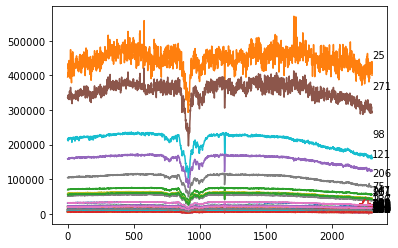

In [3]:
# make plot of photometry, with annotations to identify stars

list_brightest = [] # initialize list of brightest stars
for (columnName, columnData) in time_series.iteritems():
    #print('Column Name : ', columnName)
    if np.median(columnData.values) > 5000:
        plt.plot(columnData.values)
        plt.annotate(str(columnName), xy=(2300,np.median(columnData.values)), xycoords="data")
        list_brightest.append(str(columnName))
'''
plt.xlabel("Frame number (~5 hr observation duration)")
plt.ylabel("Direct counts (no sky subtraction)")
plt.show()
'''

In [10]:
# do the PCA analysis 
# code mostly from Ivezic, p. 297

'''
X_0 = np.random.normal(size=(100,3)) # points in 3D
R = np.random.random((3,10)) # projection matrix
X = np.dot(X_0,R) # X is now 10-dim, with 5 intrinsic dims

pca = PCA(n_components=4)
pca.fit(X)
comp = pca.transform(X) # compute the subspace projection of X

mean = pca.mean_ # mean of the data
components = pca.components_ # matrix of components
car = pca.explained_variance_ # array of eigenvalues
'''

In [4]:
# select the bright stars we want, and whiten the data

# separate out the photometry from the brightest stars
x = time_series.loc[:, list_brightest].values

# standardize the photometry
x_scaled = StandardScaler().fit_transform(x)

In [5]:
# get N principal component vectors

pca = PCA(n_components=30)
principal_components = pca.fit_transform(x_scaled)

In [6]:
# FYI: quantify variance PCA basis set accounts for

variance = pca.explained_variance_ratio_ #calculate variance ratios
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([88.5, 90.1, 91.7, 92.5, 93.1, 93.5, 93.9, 94.2, 94.5, 94.8, 95.1,
       95.3, 95.5, 95.7, 95.9, 96.1, 96.3, 96.5, 96.7, 96.9, 97.1, 97.3,
       97.5, 97.7, 97.9, 98.1, 98.2, 98.3, 98.4, 98.5])

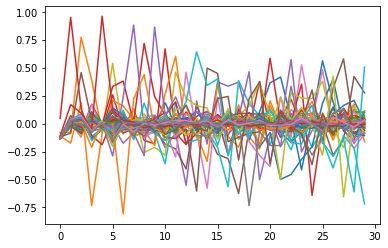

In [13]:
# print eigenvalues

for i in range(0,len(pca.components_[0,:])):
    plt.plot(pca.components_[:,i])
plt.show()

In [19]:
time_series["21"].values

array([9606.8032, 9930.6238, 9902.0719, ..., 7877.1284, 7339.3003,
       7331.0172])

In [30]:
principal_components[:,:N].shape

(2302, 10)

In [74]:
# project a given star's photometry onto a PCA subspace of N principal components, and ...

N = 10
projection_matrix = principal_components[:,:N]
single_star_data = x_scaled[:,20]


print(single_star_data.shape)
print(projection_matrix.shape)

# get the vector amplitudes
amplitudes = np.dot(single_star_data,projection_matrix)
#e_vals_dominant = np.dot(time_series["21"].values,projection_matrix)


'''
pca_2 = PCA(n_components=2)
pca_2.fit(x_scaled)
x_pca_2 = pca_2.transform(x_scaled)
'''

(2302,)
(2302, 10)


'\npca_2 = PCA(n_components=2)\npca_2.fit(x_scaled)\nx_pca_2 = pca_2.transform(x_scaled)\n'

In [75]:
amplitudes

array([-1.56323617e+04, -2.77943639e+01,  2.94525533e+01, -7.35160224e+01,
       -7.37806664e+00,  7.31280398e+01,  3.72173426e+01, -2.26837631e+01,
       -2.56766568e+01, -1.15963559e+01])

In [76]:
# multiply the basis set by these amplitudes to reconstruct the original data

recon_light_curve = np.dot(amplitudes,projection_matrix.T)

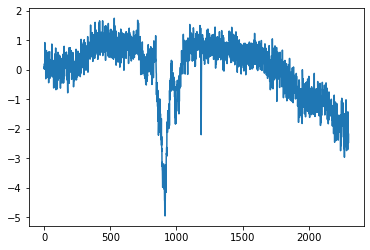

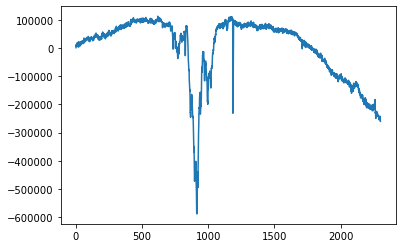

In [77]:
plt.plot(single_star_data, label="empirical, post-scaling")
plt.show()

plt.plot(recon_light_curve,label="reconstructed")
plt.show()

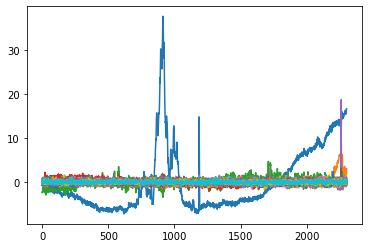

In [52]:
for i in range(0,len(principal_components[0,:])):
    plt.plot(principal_components[:,i])
plt.show()


In [44]:
Z.shape

(1, 10)

In [37]:
A = np.array([[1,3,3],[4,5,5]])
print(A.shape)

(2, 3)


In [41]:
B = np.array([[1,3],[4,5],[4,4],[6,6]])
print(B.shape)

(4, 2)


In [42]:
np.dot(B,A)

array([[13, 18, 18],
       [24, 37, 37],
       [20, 32, 32],
       [30, 48, 48]])

In [26]:
single_star_data.shape

(2302, 1)

In [20]:
x_scaled[:,0]

array([ 0.01475765,  0.33924042,  0.31063013, ..., -1.71845409,
       -2.25738197, -2.26568201])

In [18]:
Z.shape

(10,)

In [ ]:
soln_vector = np.linalg.lstsq(projection_matrix, time_series["21"].values)
recon_2d = np.dot(pca_cube[0:n_PCA,:,:].T, soln_vector[0]).T

In [47]:
np.dot(projection_matrix,e_vals_dominant).shape

(2302,)

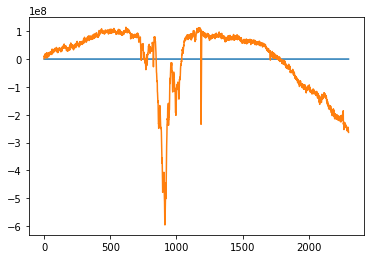

In [45]:
plt.plot(time_series["21"], label="original")
plt.plot(np.dot(projection_matrix,e_vals_dominant), label="reconstructed")
plt.show()

In [39]:
# ... subtract these first components from the data 

photometry_decorr = np.subtract(time_series["21"].values,np.dot(projection_matrix,e_vals_dominant))

In [42]:
plt.plot(photometry_decorr)
plt.show()

In [15]:
x_scaled[:,0].shape

(2302,)

In [35]:
test.shape

(10,)

In [33]:
plt.plot(test)
plt.show()

In [26]:
plt.plot(test)
plt.show()

In [ ]:
# ... subtract the first modes

In [54]:
x_pca_2

array([[-0.07678399,  0.24474025],
       [-0.68879837,  0.19119285],
       [-0.40187049,  0.16347258],
       ...,
       [15.92645315,  2.80356139],
       [16.37713863,  1.78684681],
       [16.62776886,  3.05877775]])

In [42]:
for i in range(0,len(principalComponents[0,:])):
    plt.plot(principalComponents[:,i])
plt.show()

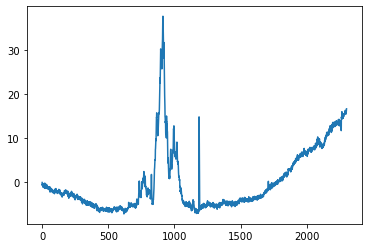

In [34]:
plt.plot(principalComponents[:,0])
plt.show()

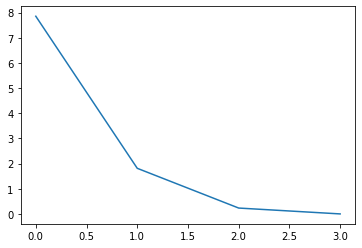

In [14]:
plt.plot(car)
plt.show()

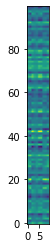

In [12]:
plt.imshow(X, origin="lower")
plt.show()

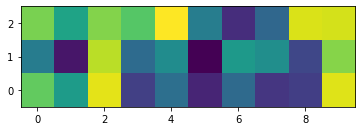

In [9]:
plt.imshow(R, origin="lower")
plt.show()

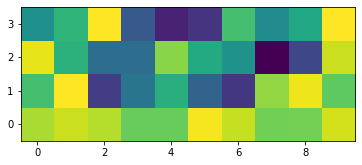

In [13]:
plt.imshow(components, origin="lower")
plt.show()